# Overview
This notebook is my attempt to make sense of https://charlienoyes.xyz/LP_Wealth.pdf 

# 1.1 Market Definition

## Statement
Equation (1.1) refers to the situation where $R_\alpha$ is being decreased by $\Delta_\alpha$ -- in other words, specifies what happens when an active trader buys $\alpha$ with $\beta$, thereby depleting the $\alpha$ reserve.

$R_\alpha - \Delta_\alpha = R_\alpha(\frac{R_\beta}{R_\beta + \Delta_\beta})^\gamma$

## Relationship to constant product

Rearranging, we obtain the equivalent to the constant product formula,

$(R_\alpha - \Delta_\alpha)(R_\beta + \Delta_\beta)^\gamma = R_\alpha R_\beta^\gamma$

Rearranging again, we obtain

$\frac{R_\alpha - \Delta_\alpha}{R_\alpha} = (\frac{R_\beta}{R_\beta + \Delta_\beta})(\frac{R_\beta}{R_\beta + \Delta_\beta})^{\gamma - 1} = (\frac{R_\beta}{R_\beta + \Delta_\beta})(\frac{R_\beta + \Delta_\beta}{R_\beta})^{1 - \gamma}$

For $\gamma = 1$, the constant product case, this says the percentage decrease in reserves of $\alpha$ is the reciprocal of the percentage increase in the reserves of $\beta$.

For $\gamma < 1$, the normal case, the final reserves of $\alpha$ are going to be greater than they would in the constant product case by a factor of $(\frac{R_\beta + \Delta_\beta}{R_\beta})^{1 - \gamma}$. For $\gamma \approx 1$, this is roughly $(1 - \gamma)$ times the increase in the reserves of $\beta$.

In other words, this setup is like a constant product market maker, except that the active trader pays an extra $(1-\gamma)$ of coin $\beta$ to obtain coin $\alpha$.









# 1.2 Path-independence of Trades

## Trades in the same direction

Let's say an active trader uses $\beta$ to buy $\alpha$ twice in a row, first for amount $\Delta_\beta^1$, then $\Delta_\beta^2$, with $\Delta_\beta^1 + \Delta_\beta^2 = \Delta_\beta^c$.

After the first trade, we have new reserves of $\alpha$, which we'll call $R_\alpha'$

$R_\alpha' = R_\alpha - \Delta_\alpha^1 = R_\alpha(\frac{R_\beta}{R_\beta + \Delta_\beta^1})^\gamma$

After the second trade, we have

$R_\alpha'' = R_\alpha' - \Delta_\alpha^2 = R_\alpha'(\frac{R_\beta'}{R_\beta' + \Delta_\beta^2})^\gamma = R_\alpha(\frac{R_\beta}{R_\beta + \Delta_\beta^1})^\gamma(\frac{R_\beta + \Delta_\beta^1}{R_\beta + \Delta_\beta^1 + \Delta_\beta^2})^\gamma  = R_\alpha(\frac{R_\beta}{R_\beta^c})^\gamma$

In other words, the new reserves of $\alpha$ depend only on the sum of $\Delta_\beta^1$ and $\Delta_\beta^2$, and are the same as if $\Delta_\beta^c$ had been traded all at once.

## Trades in opposite directions

Trades in opposite directions are trivially not path independent for $\gamma < 1$, in the sense that if an active trader first buys $\Delta_\alpha^1$ with $\Delta_\beta^1$ and then buys $\Delta_\beta^2$ with $\Delta_\alpha^2$, it is not the same as buying $\Delta_\beta^2 - \Delta_\beta^1$ with $\Delta_\alpha^2 - \Delta_\alpha^1$

To see why, assume we have a 100% fee at $\gamma = 0$.

If a trader first buys 0 $\alpha$ with 1 $\beta$, then 0 $\beta$ with 1 $\alpha$, it is certainly not the same as buying 1 $\alpha$ with 1 $\beta$, which isn't even possible in this scenario.

# 1.3 Optimal arbitrage

## optimization problem
Here, we start to treat $\beta$ as riskless, while $\alpha$ is risky. For mental convenience, we can think of $\beta$ as USDC and $\alpha$ as ETH.

We define $m_p$ to be the reference market price of $\alpha$ with respect to $\beta$, i.e. 1 ETH trades for $m_p$ USDC.

In this case, an arbitraguer considering buying ETH on Uniswap and selling it on the (assumed infinitely liquid) reference market wants to maximize 

$m_p\Delta_\alpha - \Delta_\beta = m_p (R_\alpha - R_\alpha(\frac{R_\beta}{R_\beta + \Delta_\beta})^\gamma) - \Delta_\beta$ subject to $\Delta_\alpha \geq 0, \Delta_\beta \geq 0$

## optimization solution

Taking the derivative with respect to $\Delta_\beta$ and setting to 0, we obtain

$ \frac{\gamma m_p R_\alpha R_\beta (\frac{R_\beta}{R_\beta + \Delta_\beta})^{-1 + \gamma}}{(R_\beta + \Delta_\beta)^2} = 1$

Which we can rearrange to

$\gamma m_p R_\alpha R_\beta^\gamma = (R_\beta + \Delta_\beta)^{1 + \gamma}$

and raising both sides to the $\frac{1}{1 + \gamma}$ we obtain

$\Delta_\beta = (\gamma m_p R_\alpha R_\beta^\gamma) ^ \frac{1}{1+\gamma} - R_\beta = R_\beta((\frac{m_p \gamma R_\alpha}{R_\beta})^\frac{1}{1+\gamma} - 1 ) )$

Plugging this in to the formula for $\Delta_\alpha$ and doing quite a lot of simplifying, we end up with

$\Delta_\alpha = R_\alpha(1 - (\frac{\gamma m_p R_\alpha}{R_\beta})^{\frac{1}{1 + \gamma} -1})$

As pointed out in the paper, these are the unconstrained solutions, which can in this case be transformed to the constrained solutions simply by flooring them, so that we finally have

$\Delta^*_\alpha = (R_\alpha(1 - (\frac{\gamma m_p R_\alpha}{R_\beta})^{\frac{1}{1 + \gamma} -1}))_+$

$\Delta^*_\beta = (R_\beta((\frac{m_p \gamma R_\alpha}{R_\beta})^\frac{1}{1+\gamma} - 1 ) ))_+$

## no-arbitrage bounds

Let $m_u = \frac{R_\beta}{R_\alpha}$ be how much $\beta$ you need to buy one $\alpha$ on our AMM without fees. (Note in the paper $m_u$ is defined as $\frac{R_\alpha}{R_\beta}$, but I believe that's a typo.)

There is an arbitrage when $\Delta^*_\alpha > 0$.

$ 0 < \Delta^*_\alpha \iff 0 < 1 - (\frac{\gamma m_p R_\alpha}{R_\beta})^{\frac{1}{1 + \gamma} -1} \iff \frac{\gamma m_p R_\alpha}{R_\beta} > 1 \iff \gamma m_p > \frac{R_\beta}{R_\alpha} \iff \gamma m_p > m_u$

So traders will be arbitraging against the AMM as long as $\gamma m_p > m_u$.

This makes a lot of sense -- if we have no fee at $\gamma = 1$, and $m_p > m_u$, we're going to want to buy some $\alpha$ for $m_u$ and sell it for $m_p$. This will have the effect of reducing $R_\alpha$ and increasing $R_\beta$, thereby increasing $m_u$ and eliminating the arb. With a fee of $\gamma$, this is only profitable when we make more on the round trip than the fee is costing us.

Swapping $\beta$ for $\alpha$ in all of the above equations, we see that there will also be an arbitrage when $\gamma \frac{1}{m_p} > \frac{1}{m_u} \iff m_p\gamma^{-1} < m_u$

Putting it all together, then, we can say there will be no arbitrage available when

$\gamma m_p \leq m_u \leq \gamma^{-1}m_p$


# Post-arbitrage reserve sizes

## Reserve size after an arbitrage buy of $\alpha$

Let's say $m_p$ has been within the no-arbitrage bounds, so that $\gamma m_p \leq m_u$, but suddenly $m_p$ increases to $m_p'$ and we have $\gamma m_p' > m_u$. Somebody will come and fully arb the trade... but what happens to our reserves $R'_\alpha$ and $R'_\beta$?

Well, we have

$R'_\alpha = R_\alpha - \Delta^*_\alpha$

and

$\Delta^*_\alpha = (R_\alpha(1 - (\frac{\gamma m_p' R_\alpha}{R_\beta})^{\frac{1}{1 + \gamma} -1}))_+$

so

$R'_\alpha = R_\alpha(\frac{\gamma m_p' R_\alpha}{R_\beta})^{\frac{1}{1 + \gamma} -1} = R_\alpha(\frac{\gamma m_p' R_\alpha}{R_\beta})^{-\frac{\gamma}{\gamma+1}}$

and since

$R'_\alpha {R'_\beta}^\gamma = R_\alpha R_\beta^\gamma$

we obtain

$R'_\beta = (\frac{R_\alpha}{R'_\alpha})^{\frac{1}{\gamma}}R_\beta = (\frac{\gamma m_p' R_\alpha}{R_\beta})^{\frac{1}{\gamma+1}}R_\beta$

## Common Terms

Following the paper, we will declare

$C_l = \frac{\gamma m_p' R_\alpha}{R_\beta}$

and note

$R'_\alpha = R_\alpha C_l ^ {- \frac{\gamma}{\gamma+1}}$

$R'_\beta = R_\beta C_l ^ {\frac{1}{\gamma+1}}$

## The other bound

Swapping $\alpha$ for $\beta$ and $\frac{1}{m_p}$ for $m_p$ gives us

$\hat{C}_h = \frac{\gamma R_\beta}{m'_p R_\alpha}$

but to stick with the paper we'll use its reciprocal

$C_h = \frac{m'_p R_\alpha}{\gamma R_\beta}$

to obtain, for cases when $\frac{1}{\gamma}{mp} < m_u$

$R'_\alpha = R_\alpha C_h ^ {- \frac{1}{\gamma+1}}$

$R'_\beta = R_\beta C_h ^ {\frac{\gamma}{\gamma+1}}$

## Scale invariance

In case this proves useful:

Let's say a kindly fairy multiplies our AMM reserves by some large number k, such that we now hold $k R_\alpha$ BTC and $k R_\beta$ USDC.

Note

$C_l = \frac{\gamma m_p' R_\alpha}{R_\beta} = \gamma\frac{m'_p}{m_u}$

$C_h = \frac{m'_p R_\alpha}{\gamma R_\beta} = \frac{1}{\gamma} \frac{m'_p}{m_u}$

so that both of these quantities remain unchanged.

If, for example, the price of BTC suddenly rises, so that an arbitrageur comes in to buy, we will now be holding

$R'_\alpha = k R_\alpha C_l ^ {- \frac{\gamma}{\gamma+1}}$

$R'_\beta = k R_\beta C_l ^ {\frac{1}{\gamma+1}}$

If the fairy then changes her mind and scales our reserves back down by k, we will be holding 

$R'_\alpha = R_\alpha C_l ^ {- \frac{\gamma}{\gamma+1}}$

$R'_\beta = R_\beta C_l ^ {\frac{1}{\gamma+1}}$

It will be just as if the scaling had never occurred.

# 2 No-Arbitrage Under Brownian Motion

Let $S(t)$ be a Geometric Brownian motion

$dS(t) = \mu S(t) dt + \sigma S(t) dZ(t)$

where $Z$ is a standard Brownian motion.

If we let $S(t)$ stand in for $m_p$ and assume no-arbitrage holds, the LP wealth process $W(t)$ can be expressed as

$W(t) = R_\alpha(t)S(t) + R_\beta(t)$

Given known $\mu$, $\sigma$, and $\gamma$, we define the exponential growth rate of LP wealth $G$ as 

$G = \mathop{\mathbb{E}}[\displaystyle{\lim_{T\to\inf}}\frac{1}{T}\log(W(T))]$

# Simulation

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

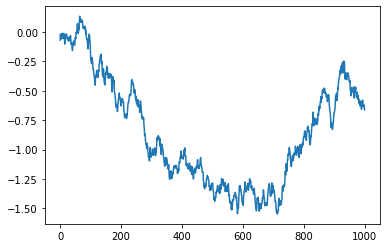

In [2]:
def get_z(num_samples, num_steps, step_size):
  w = torch.randn(num_samples, num_steps) * np.sqrt(step_size)
  return torch.cumsum(w, 1)

step_size = 0.001

z = get_z(3, 1000, step_size)

plt.plot(z[0])

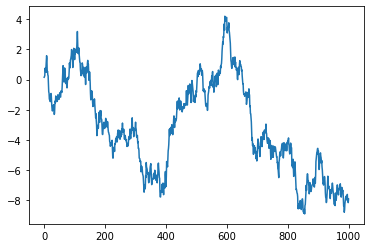

In [224]:
def get_t(steps, step_size):
  return (torch.arange(0, steps) + 1) * step_size


def get_log_s(z, s_zero, mu, sigma, step_size):
  t = get_t(z.shape[1], step_size)
  return torch.log(s_zero) + (mu - sigma ** 2 / 2)*t + sigma * z

plt.plot(get_log_s(z, torch.tensor(1.), 1/2, 1., step_size)[2])

In [225]:
def get_new_reserves(reserve_tensor, gamma, s):
  r_alpha = reserve_tensor[...,0]
  r_beta = reserve_tensor[...,1]
  m_u = r_beta / r_alpha

  c_l = gamma * s / m_u
  c_h = s / gamma / m_u

  # AMM price too low
  r_alpha_updated = torch.where(m_u < gamma * s, r_alpha * torch.pow(c_l, -1 * gamma / (gamma + 1)), r_alpha)
  r_beta_updated = torch.where(m_u < gamma * s, r_beta * torch.pow(c_l, 1 / (gamma + 1)), r_beta)

  # AMM price too high
  r_alpha_updated = torch.where(m_u >  s / gamma, r_alpha * torch.pow(c_h, -1 / (gamma + 1)), r_alpha_updated)
  r_beta_updated = torch.where(m_u > s / gamma, r_beta * torch.pow(c_h, gamma / (gamma + 1)), r_beta_updated)

  return torch.stack((r_alpha_updated, r_beta_updated), dim = -1)

print(get_new_reserves(torch.ones(2), 0.5, 1))
print(get_new_reserves(torch.ones(2), 0.5, 16))
print(get_new_reserves(torch.ones(2), 0.5, 1./16))

tensor([1., 1.])
tensor([0.5000, 4.0000])
tensor([4.0000, 0.5000])


We're going to make another function that keeps track of reserves in log space, because otherwise we run into all kinds of numerical issues.

In [226]:
def get_new_log_reserves(log_reserve_tensor, gamma, log_s):
  log_r_alpha = log_reserve_tensor[...,0]
  log_r_beta = log_reserve_tensor[...,1]
  
  log_m_u = log_r_beta - log_r_alpha

  log_gamma = torch.log(gamma)
    
  log_c_l = log_gamma + log_s - log_m_u
  log_c_h = log_s - log_gamma - log_m_u

  # AMM price too low
  log_r_alpha_updated = torch.where(log_m_u < log_gamma + log_s, log_r_alpha + log_c_l * (-1 * gamma / (gamma + 1)), log_r_alpha)
  log_r_beta_updated = torch.where(log_m_u < log_gamma + log_s, log_r_beta + log_c_l * (1 / (gamma + 1)), log_r_beta)
  
  # AMM price too high
  log_r_alpha_updated = torch.where(log_m_u > log_s - log_gamma, log_r_alpha + log_c_h * (-1 / (gamma + 1)), log_r_alpha_updated)
  log_r_beta_updated = torch.where(log_m_u > log_s - log_gamma, log_r_beta + log_c_h * (gamma / (gamma + 1)), log_r_beta_updated)

  return torch.stack((log_r_alpha_updated, log_r_beta_updated), dim = -1)

print(torch.exp(get_new_log_reserves(torch.zeros(2), torch.tensor(0.5), torch.tensor(1.))))
print(torch.exp(get_new_log_reserves(torch.zeros(2), torch.tensor(0.5), torch.tensor(16.))))
print(torch.exp(get_new_log_reserves(torch.zeros(2), torch.tensor(0.5), torch.tensor(1./16))))

tensor([0.9028, 1.2270])
tensor([6.0828e-03, 2.7026e+04])
tensor([1., 1.])


In [227]:
def get_log_reserve_tensor(gamma, log_s, s_zero):
  out_tensor = torch.zeros(list(log_s.shape) + [2])
  out_tensor[...,1] = torch.log(s_zero)
  for i in range(1, log_s.shape[1]):
    if i % max(round(log_s.shape[1]/10),2) == 1:
      print(i, log_s.shape[1])
    out_tensor[:,i,:] = get_new_log_reserves(out_tensor[:,i-1,:], gamma, log_s[:,i])
  return out_tensor

s = torch.ones(3, 2)
s[0,1] = 1
s[1,1] = 16
s[2,1] = 1 / 16

torch.exp(get_log_reserve_tensor(torch.tensor([1, 0.01, 0.5]), torch.log(s), torch.tensor(1.)))[:,-1,:]


1 2


tensor([[1.0000, 1.0000],
        [1.0000, 1.0000],
        [4.0000, 0.5000]])

In [305]:
step_size = 0.001
num_steps = 100000
num_samples = 200
z = get_z(num_samples, num_steps, step_size)
log_s = get_log_s(z, torch.tensor(1.), 0, 1, step_size)
log_reserves = get_log_reserve_tensor(torch.tensor(0.5), log_s, torch.tensor(1.))

1 100000
10001 100000
20001 100000
30001 100000
40001 100000
50001 100000
60001 100000
70001 100000
80001 100000
90001 100000


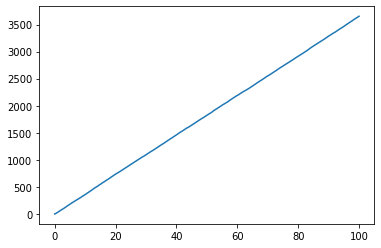

In [315]:
sbn.lineplot(x[:-1], torch.cumsum(torch.mean(torch.where(log_reserves[:,1:,0] != log_reserves[:,:-1,0], torch.tensor(1.), torch.tensor(0.)), 0),0))

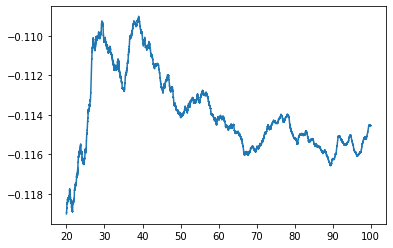

In [307]:
x = get_t(num_steps, step_size)
y = torch.mean(log_reserves[:,:,1], 0)/get_t(num_steps, step_size)
sbn.lineplot(x[20000:],y[20000:])

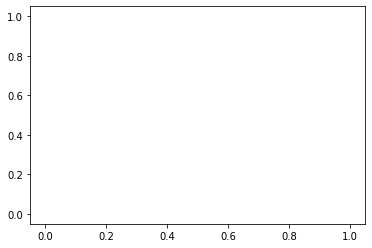

In [266]:
sbn.scatterplot(log_s[:,-1] + log_reserves[:,-1,0], log_reserves[:,-1,1])

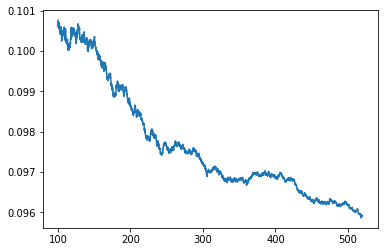

In [78]:

mw = torch.mean(np.log(wealth), 0)
sns.lineplot(get_t(num_steps, step_size)[1000:], (mw / get_t(num_steps, step_size))[1000:])

In [81]:
num_steps * step_size

10000.0

0.1